# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [3]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**  
The Smartcab is not moving at all and it is remaining still at the starting point. So, the rewards are going to be based only on one action that is 'None'. 

From U.S. right-of-way traffic laws, we know that red light means the agent should stop. By not moving, the cab does this correctly and hence receives a positive reward.  
Also, green light means the agent should move. By not moving, the agent doesn't adhere to this, so it receives a negative reward.

Effectively, the rewards are positive for red light and negative for green light. So, rewards are only dependent on traffic light and not on the agent's actions.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**  
The 3 flags in *agent.py* which greatly affect the simulation are:


- Epsilon
- Alpha
- Tolerance 

**Epsilon:**  
Epsilon is the explaration probability. Epsilon determines the probability with which the Smartcab chooses the action at random at any given time. Epsilon is written as a decaying function. As epsilon decays, the number of random actions reduce and number of learned actions increase.
Epsilon decay function also determines the number of training trials the Smartcab undergoes.  


**Tolerance:**  
Tolerance is the value of Epsilon after which training stops and testing starts. It helps to stop the training trials at the right time after which training might just be time-consuming without much learning or could even negatively affect learning.  


**Alpha:**  
Alpha is the learning rate, which tells how much importance is given to the present reward in comparison to the past rewards for any state-action pair.  

The *'act(self, agent, action)'* function in environment.py is called after the agent chooses an action.

In the simulator.py, *'render_text()'* is the non-GUI render display of the simulations. Simulated trial data will be rendered in the terminal/command prompt. *'render()'* is the GUI render display of the simulation. Supplementary trial data can be found from render_text.

In planner.py, the *'next_waypoint()'* function considers East-West direction first before considering North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


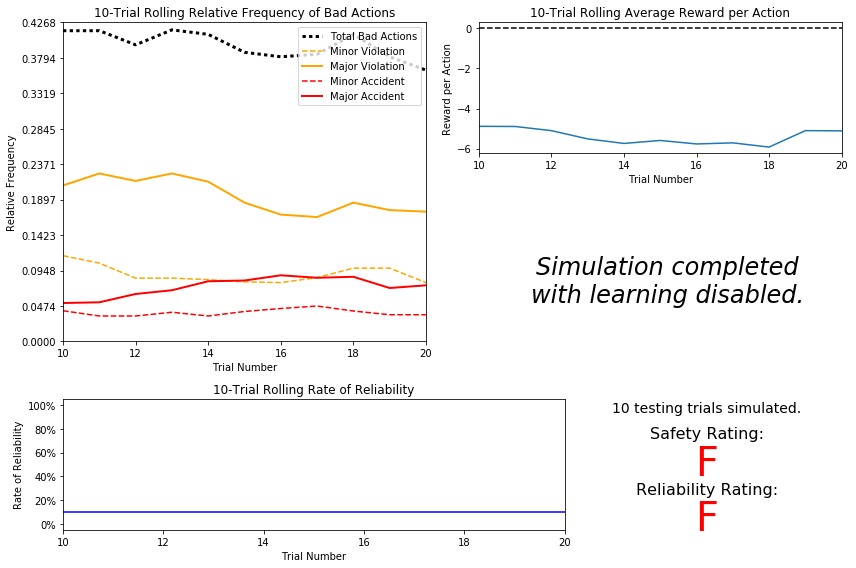

In [7]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**  
As the driving agent only takes random actions, ‘F’ score for both Safety and Reliability makes sense. 

The frequency of bad actions is between 38% to 40%. Most of the bad actions were major violations(18%-20%), but accidents are less. Only 5%-10% of the bad actions resulted in accidents(major/minor).

Reliability remians at 15% throughout, which means, even if actions are random, it can still reach destination 15% of time. But this number is too low to consider the smartcab reliable or even for rate of reliability to make sense. As the number of trials increases, this number remains constant(a perfect line).

The reward per action stayed between -5  and -6 points per action. Yes, it does suggest that it has been penalized heavily.

As the number of trials increased, most of the observed values remain almost the same. There is no improvement seen, which would make sense, since the basic driving agent is not learning.

This version of Smartcab would not be considered safe or reliable for its passengers, given the number of bad decisions it makes and the rate of reliability.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**  
The features available to the agent that are most relevant for learning both safety and efficiency are:

- 'waypoint'
- 'light' 
- 'inputs':
  * 'oncoming'
  * 'left' 
  * 'right' 

            
'Waypoint' helps the agent learn to drive towards the destination which increases reliability. 'input' which is the sensor date at any intersection('light','left', 'right', 'oncoming') help the agent learn to avoid accidents/violations, which is eventually needed for safety.

'deadline' only helps the agents learn the number of actions left for the agent to take before reaching destination. In order to reach the destination, the agent need not learn to take any action based on the deadline as long as it is following the waypoint, whenever possible. Also, when there are less steps left to reach destination, the agent might learn to take unsafe actions in order to reach destination within time, which is not the intent.   
Also, adding deadline to the state, drastically increases the statespace, which means that the chance of agent arriving at any state more than once is highly improbable. This in turn negatively affects learning.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**  

| Feature          | Possible States            | Number of states |
|------------------|----------------------------|------------------|
| light_color      | red, green                 | 2                |
| oncoming_traffic | left, right, forward, None | 4                |
| left_traffic     | left, right, forward, None | 4                |
| right_traffic    | left, right, forward, None | 4                |
| waypoint         | left, right, forward, None | 4                |

The total state space = 2x4x4x4x4 = 512.  
There are 4 possible actions(Forward, Right, Left, None) for each state.  
So, the total number of state-action pairs is 512x4 = 2048. 

With this state space, it should be possible for the agent to cover most state-action pairs in a finite number of training trials. This means, it should learn a policy for each state within reasonable time.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

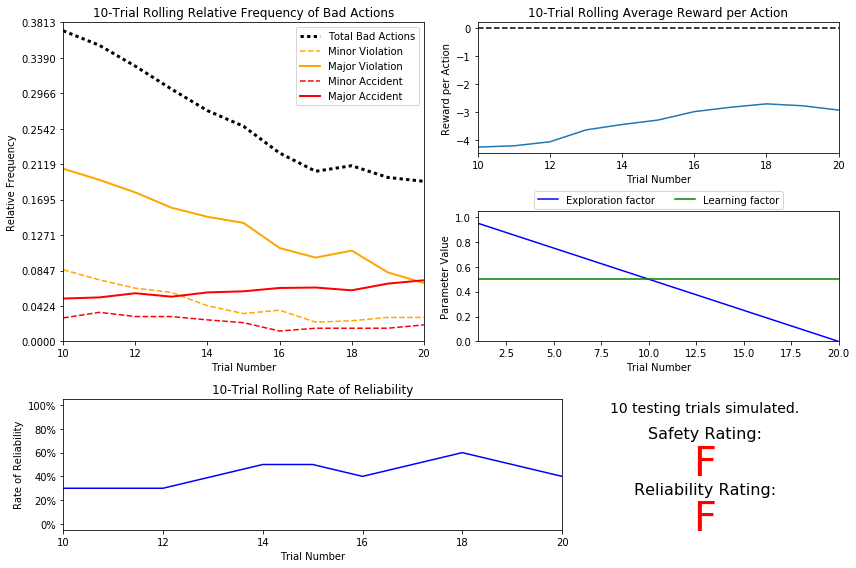

In [8]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**  
Both the basic driving agent and the default Q-Learning agent have F rating for both reliability and safety. But, in the default Q-Learning agent bad actions reduce over time. It decrease from 39% to 21%. The rate of reliability goes up from 30% to 40%. Even reward per action goes from -4.5 to -3. Safety and reliability are definitely better than the basic driving agent over time. 

Both safety and reliability are improving as the number of training trials increased. But the agent is not able to train completely before testing. 

The decaying function for epsilon is as follows:  
self.epsilon = self.epsilon - 0.05
 
Given the epsilon's initial value of 1 and epsilon-tolerance of 0.05; there are only 20 training trials, which is not enough to train the agent completely.  
Yes, the decaying function is accurately represented in the parameters panel.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

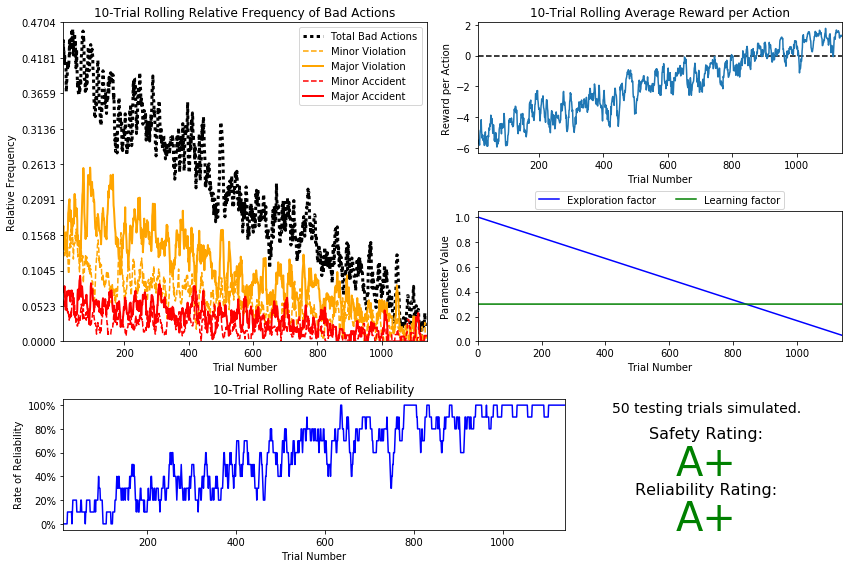

In [22]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**  
For epsilon, I used a linear decaying function with alpha = 0.3 and tolerance = 0.05. The inital value of epsilon is 1.

self.epsilon = self.epsilon - (1.0/1200)

Because of such a decay function, I was able to tune the number of training trials which is the denominator in the above eqn. Effectively, epsilon will reach 0 at 1200th trial.

I tried different number of training trials starting from 30 to 1200, while also tuning the alpha. The agent seems to be completely trained around ~1100 trials. That is the reason for a tolerance of 0.05. Also when the number of trials increased, results were better if the alpha was lesser. I tried different values for alpha starting at alpha = 0.5 and when I increase the number of trials, I reduced the alpha. I found that the best resuts were acheived at alpha = 0.3 for 1200 training trials. So, I finalized 0.3 for alpha.

The agent's reliability reaches ~100% towards the end of the training. Similarly bad actions reaches ~0%. Reward per action linearly increases from -6 to +2. All of these are clearly summarized by the safety and reliability rating of A+ which is the highest possible rating. These results show that the driving agent successfully learnt an appropriate policy, suppossedly the optimal policy itself.

The improved Q-learning agent is definitely better than the basic Q-learning agent, as visualized by the decrease in bad actions and increase in reliability compared to the basic Q-learning agent. Both Reliability and safety grades improved from F to A+  
This improvement comes with increased training time. But this increase in training time, resulted in the agent successfully learning safety and reliability. I am very satisfied with the safety and reliability ratings of the Smartcab.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:**  
1.Optimal Policy:  
*All blank entries in the below table means that the particular entry doesn't matter*

  | Traffic_Light | Waypoint        | Oncoming_vehicle_waypoint            | Left_vehicle_waypoint                                         | Right_waypoint | Policy/Action    |
|---------------|-----------------|--------------------------------------|---------------------------------------------------------------|----------------|------------------|
| Red           | Left or Forward |                                      | Anything other than Forward (matters only if policy is Right) |                | Right or None    |
| Red           | Right           |                                      | Anything other than Forward                                   |                | Right            |
| Red           | Right           |                                      | Forward                                                       |                | None             |
| Green         | Forward         |                                      |                                                               |                | Forward          |
| Green         | Right           |                                      |                                                               |                | Right            |
| Green         | Left            | Anything other than Forward or Right |                                                               |                | Left             |
| Green         | Left            | Right or Forward                     |                                                               |                | Forward or Right |

This is the optimal policy based on the U.S. right-of-way traffic laws while trying to stick to waypoint. 
The first and last cases are the ones whether the agent cannot stick to waypoint without causing accidents; and there are two valid options available. The policy is agent's choice; both choices are not considered incorrect. Whichever action is found to increase the reliability based on Q-learning results, agent will follow the same.  
In the first case, the left vehicle's waypoint matters only if the agent is planning to move right.

From this table, it is also clear that we dont have to consider the vehicle on right at any point. So, we might be tempted to remove that from the state, to reduce the size of statespace. But this information is known only from the U.S. right-of-way traffic laws. We will still have to include the 'right' vehicle's waypoint in the state and let the agent learn that it need not consider this info while deciding the policy.

2.Most states have learnt the optimal policy. I found this one example where the policy is suboptimal.  
State dictionary: *('waypoint', 'light', 'oncoming', 'left' , 'right')*  
```
('right', 'red', 'forward', None, 'right')
 -- forward : -6.28
 -- right : 0.79
 -- None : 0.81
 -- left : 0.00
```

3.Examples of states with Optimal policy:  
```
 ('forward', 'green', 'forward', None, None)
 -- forward : 2.02
 -- right : 0.64
 -- None : -5.17
 -- left : -20.09
 ```
 
 In this scenario, the agent has learnt to move forward in green. If you observe closely, the agent has learnt a few more things. Making a right in green would still not be a violation, so the value is positive though less(because it will take it further from destination). Not moving in green is a traffic violation though not an accident, so 'None' is penalized slightly. But taking a left when the the oncoming traffic is moving forward would cause an accident, so left is penalised heavily.

```
('left', 'green', 'forward', None, 'right')
 -- forward : 0.76
 -- right : 0.02
 -- None : -4.58
 -- left : -13.02
 ```
 
 In this scenario, taking a left would cause an accident(oncoming traffic is moving forward). Not moving is a violation though not an acident. So, both of these penalized accordingly. It could move forward or right according to the optimal policy. It has learnt to move forward when it could not take a left, since it gets closer to destination that way compared to right.

```
('forward', 'red', 'forward', None, 'forward')
 -- forward : -33.18
 -- right : 0.34
 -- None : 2.01
 -- left : -35.26
 ```
 
 In this particular scenario, moving forward or left would be violations, so they are heavily penalized. The agent could move right or stop according to the optimal policy. Even taking right will not cause any violations, because the left vehicle's waypoint is 'None'. But the agent has learnt to stop and not turn right since taking right takes it farther from destination compared to not moving. 
 
 ```
 ('right', 'red', 'right', 'forward', 'left')
 -- forward : -12.23
 -- right : 0.00
 -- None : 0.16
 -- left : -12.14
```

```
('right', 'red', 'left', None, 'left')
 -- forward : -8.92
 -- right : 1.55
 -- None : 0.48
 -- left : -8.65
 ```
 
 In these 2 scenarios, though the waypoint is right, the agent has learnt when to make a right and when not to(when left traffic is moving forward). Taking a left or moving forward in red are heavily penalised.
 
4.I found this one example where the policy is suboptimal.  
```
('right', 'red', 'forward', None, 'right')
 -- forward : -6.28
 -- right : 0.79
 -- None : 0.81
 -- left : 0.00
```
In this scenario, where the left traffic is 'None', the agent could have followed its waypoint which is 'Right'. The optimal policy for this state is 'right'. But the policy which the agent learnt is 'None'.   
The reason why this might have been  happened is that, both 'None' and 'Right' dont cause any violations. So, both are valid actions and both get postitive rewards; the reward for not following the waypoint is slightly lesser.  
When the random choices were made in the initial phase of training, 'None'  might have been chosen randomly more number of times than 'right', which resulted in a slightly higher value for 'None'. Hence the suboptimal policy. This would still not affect the safety, it might have a smaller impact on the reliability.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**  
Future rewards should not be considered due to the selfish nature of the Smartcab. It is always trying to maximize the reward. If there is additional reward to reach the goal, that would reduce the effect of penalty for making violations. So the smartcab would not bother about violations as long as it can get to the destination faster. The smartcab should always value reliability against safety. It should not be skewed towards reaching the destination irrespective of making violations. Then it would be a cause for safety concern. Furthermore, future rewards are not needed to lead the agent towards destination; it is taken care of by the 'waypoint' in the state. So, future rewards should not be considered for a smartcab because, firstly, it is not needed and it could also negatively affect its decisions.

The use of future rewards is also invalidated by the environment because destination is not constant across trials. If the destination was constant for every trial, it would make sense for the agent to learn the action at every state which will take it closer to the destination. The cab would learn to follow the shortest possible path using future rewards. However, the destination is randomly generated for every trial. So, using the future reward doesnt make sense for an environment where there is no fixed destination.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.